In [ ]:
#make folder to save dataset
import os 
os.mkdir('/content/dataset')
%cd /content/dataset

# download file from gg drive to the folder
!pip install gdown
link = 'https://drive.google.com/file/d/1Q4lf5rLfItDFr8h8mk94AMl3AYqpGgcj/view?usp=sharing'
!gdown --id 1Q4lf5rLfItDFr8h8mk94AMl3AYqpGgcj

In [ ]:
#unzip file to take image from dataset
!unzip "/content/dataset/dataset.zip" \
    -d "/content/dataset"

In [ ]:
# import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import warnings

warnings.filterwarnings('ignore')

In [ ]:
%cd /content/dataset/dataset/
data = []
labels = []
classes = 43 
cur_path = os.getcwd()
print(cur_path)
for i in range(classes): 
    path = os.path.join(cur_path,'Train', str(i))
    print(path)
    print(os.listdir(path))
    images = os.listdir(path) 
    for a in images: 
        image = Image.open(path + '/'+ a) 
        image = image.resize((30,30)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(i) 
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
print(y_t1)

[36 28  2 ... 39  1 10]


In [ ]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [ ]:
print(y_t1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape = (30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/15
981/981 [==============================] - 144s 145ms/step - loss: 1.6404 - accuracy: 0.6006 - val_loss: 0.2572 - val_accuracy: 0.9443
Epoch 2/15
981/981 [==============================] - 144s 147ms/step - loss: 0.4097 - accuracy: 0.8890 - val_loss: 0.1235 - val_accuracy: 0.9722
Epoch 3/15
981/981 [==============================] - 145s 148ms/step - loss: 0.2798 - accuracy: 0.9242 - val_loss: 0.0690 - val_accuracy: 0.9836
Epoch 4/15
981/981 [==============================] - 143s 146ms/step - loss: 0.2351 - accuracy: 0.9374 - val_loss: 0.0713 - val_accuracy: 0.9802
Epoch 5/15
981/981 [==============================] - 143s 146ms/step - loss: 0.2168 - accuracy: 0.9423 - val_loss: 0.0505 - val_accuracy: 0.9867
Epoch 6/15
981/981 [==============================] - 143s 145ms/step - loss: 0.2072 - accuracy: 0.9470 - val_loss: 0.0526 - val_accuracy: 0.9857
Epoch 7/15
981/981 [==============================] - 143s 146ms/step - loss: 0.1865 - accuracy: 0.9529 - val_loss: 0.0393 -

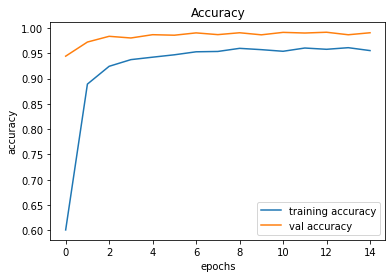

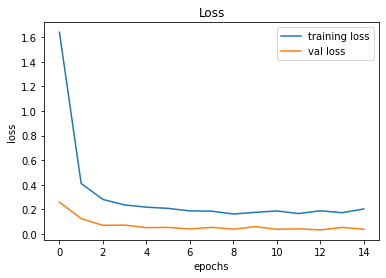

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
%cd /content/dataset/dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test = np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)

/content/dataset/dataset


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9587490102929533


In [ ]:
%cd /content/
model.save("traffic_classifier.h5")

/content


In [ ]:
#dictionary to label all traffic signs class.
classes = {1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }

In [ ]:
%cd /content/
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.models import load_model
model = load_model('traffic_classifier.h5')

/content


Saving 08588.png to 08588.png


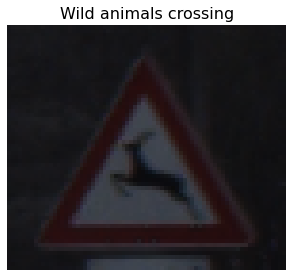

In [20]:
uploaded = files.upload()
fig = plt.figure(figsize=(5, 5))
for fn in uploaded.keys():
  path = fn
  image_to_show = plt.imread(path)
  plt.imshow(image_to_show) 
  img = image.load_img(path, color_mode="rgb", target_size=(30, 30))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  class_predict = model.predict(images, batch_size=10)
  class_position = np.argmax(class_predict,axis=1)
  classification = classes[class_position[0]+1]
  plt.title(classification.format(i), fontsize=16)
  plt.axis('off')
  plt.show()